In [1]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import scipy.stats
import sklearn.decomposition
import sklearn.manifold
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('../peptidome.mplstyle')

import sys
sys.path.append('..')
from lib import *

In [2]:
df = load_proteome_as_df('Human')
print('multiple seqs', len(df['Sequence'])-len(df['Sequence'].unique()))
df.drop_duplicates(subset=['Sequence'], inplace=True)

multiple seqs 66


In [21]:
counter = count_kmers_iterable(df['Sequence'], 1)

In [22]:
def counter_to_series(counter):
    count_df = pd.DataFrame.from_dict(counter, orient='index', columns=['count'])
    count_series = count_df.T.squeeze()
    return count_series

In [23]:
count_series = counter_to_series(counter)

In [24]:
np.sum(count_series[count_series>1])/np.sum(count_series)

1.0

In [7]:
count_series[count_series>10]

RFSGSGSGTDFT    29
FSGSGSGTDFTL    28
SGSGSGTDFTLT    21
GSGSGTDFTLTI    21
SGSGTDFTLTIS    19
                ..
AQENALVSYSLV    11
QENALVSYSLVE    11
ENALVSYSLVER    11
NALVSYSLVERR    12
VLLVDGFSQPYL    12
Name: count, Length: 4292, dtype: int64

In [8]:
count_series.idxmax()

'QQQQQQQQQQQQ'

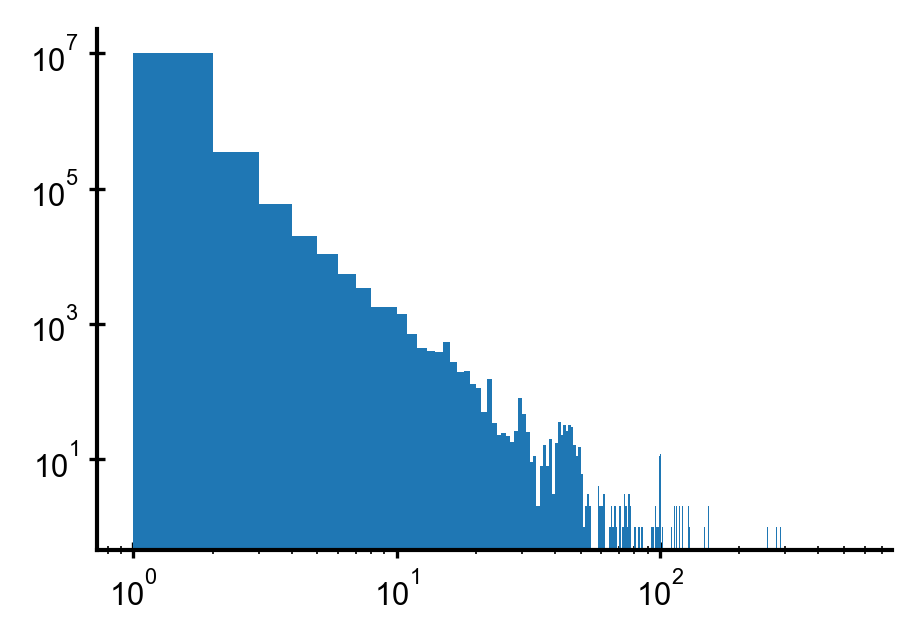

In [18]:
plt.hist(count_series, log=True, bins=np.arange(0, count_series.max()+1, 1));
plt.xscale('log')

In [10]:
counter_filtered = count_kmers_iterable(count_series.index.str[:9], 9)

In [11]:
count_series_filtered = counter_to_series(counter_filtered)

In [12]:
count_series_unfiltered = counter_to_series(count_kmers_iterable(df['Sequence'], 9))

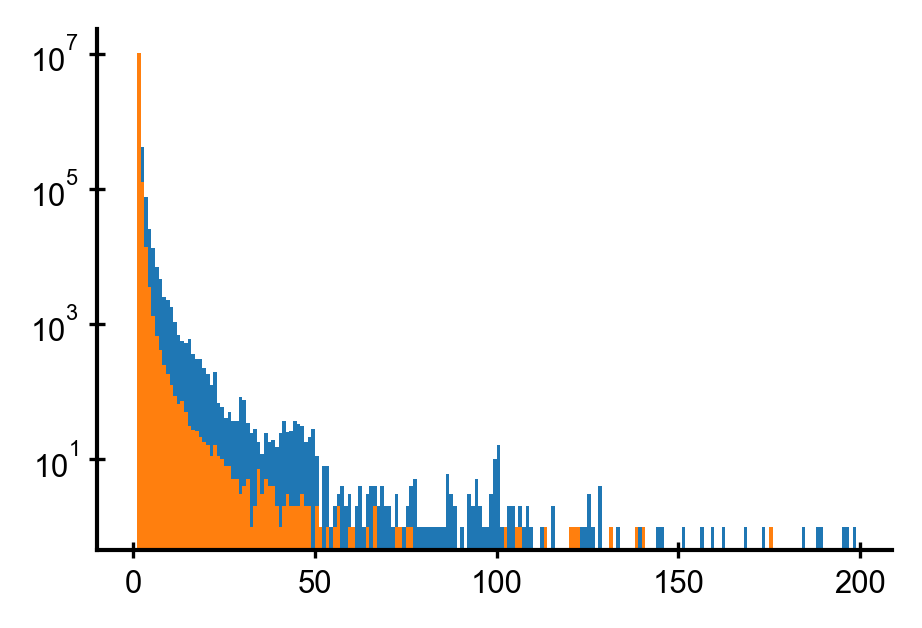

In [13]:
plt.hist(count_series_unfiltered, log=True, bins=np.arange(0, 200, 1))
plt.hist(count_series_filtered, log=True, bins=np.arange(0, 200, 1));

In [14]:
'{:.3e}, {:.3e}'.format(len(count_series_filtered), len(count_series_unfiltered))

'1.034e+07, 1.040e+07'

In [15]:
count_series_filtered.idxmax()

'AAAAAAAAA'

In [20]:
count_series_unfiltered.sort_values().tail(10)

RTHTGEKPY    434
HQRIHTGEK    446
SSSSSSSSS    492
AAAAAAAAA    552
IHTGEKPYK    560
EEEEEEEEE    560
HTGEKPYEC    690
QQQQQQQQQ    787
RIHTGEKPY    807
HTGEKPYKC    873
Name: count, dtype: int64

In [19]:
count_series_filtered.sort_values().tail(10)

HTGEKPYKC    106
GGGGGGGGG    113
ECKECGKAF    120
KCEECGKAF    121
RIHTGEKPY    122
SSSSSSSSS    131
QQQQQQQQQ    138
PPPPPPPPP    140
EEEEEEEEE    175
AAAAAAAAA    216
Name: count, dtype: int64